In [18]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from threshold import *

SAVE_TO = 'temp/'

In [8]:
p_range = (0, 1.5)
r_range = (0, 1.5)
inside_circle = lambda p, r: (p**2 + r**2) < 1

img, results = boundary_search(p_range, r_range, inside_circle, max_depth=10)

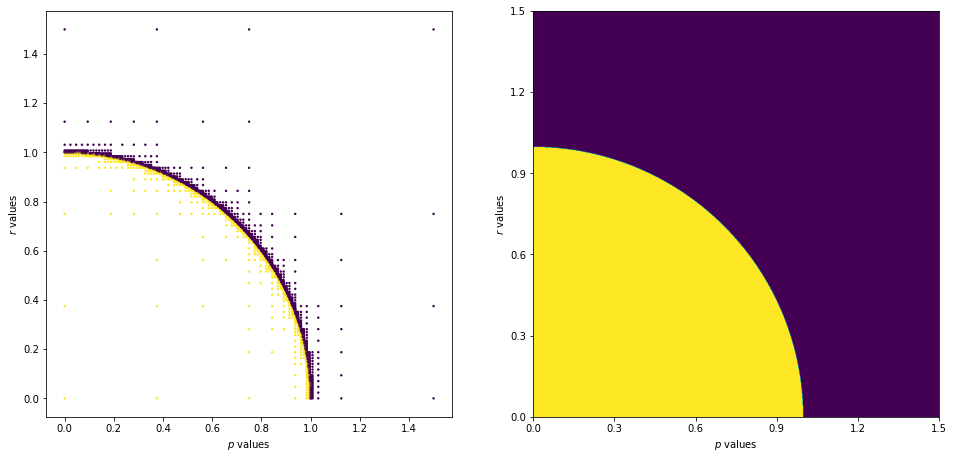

In [13]:
p_coords = []
r_coords = []
threshs = []
for (p, r), t in results.items():
    p_coords.append(p)
    r_coords.append(r)
    threshs.append(t)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

scat = ax1.scatter(p_coords, r_coords, c=threshs, s=2, cmap='viridis')

ax2.imshow(img)
ax2.invert_yaxis()
TICKS = 6
ax2.set_xticks(np.linspace(*ax2.get_xlim(), TICKS))
ax2.set_xticklabels(np.around(np.linspace(*p_range, TICKS), decimals=1))
ax2.set_yticks(np.linspace(*ax2.get_ylim(), TICKS))
ax2.set_yticklabels(np.around(np.linspace(*r_range, TICKS), decimals=1))

for ax in (ax1, ax2):
    ax.set_aspect('equal')
    ax.set_xlabel('$p$ values')
    ax.set_ylabel('$r$ values')

  0%|          | 0/10 [00:00<?, ?it/s]

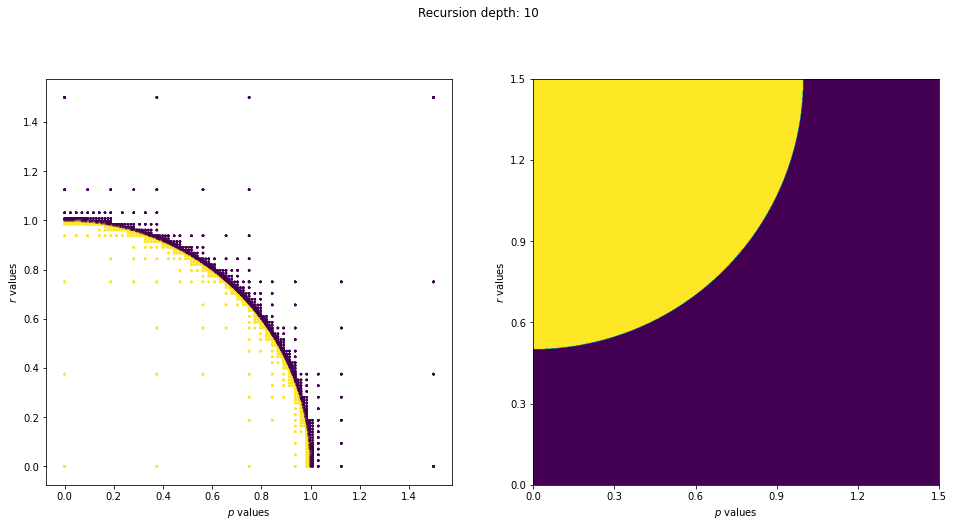

In [34]:
from matplotlib.animation import FuncAnimation, PillowWriter
from tqdm.auto import tqdm

p_range = (0, 1.5)
r_range = (0, 1.5)
inside_circle = lambda p, r: (p**2 + r**2) < 1
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
TICKS = 6

for ax in (ax1, ax2):
    ax.set_aspect('equal')
    ax.set_xlabel('$p$ values')
    ax.set_ylabel('$r$ values')

def update(frame):
    fig.suptitle(f'Recursion depth: {frame}')
    img, results = boundary_search(p_range, r_range, inside_circle, max_depth=frame)
    
    p_coords = []
    r_coords = []
    threshs = []
    for (p, r), t in results.items():
        p_coords.append(p)
        r_coords.append(r)
        threshs.append(t)

    artists = [
        ax1.scatter(p_coords, r_coords, c=threshs, s=2, cmap='viridis'),
        ax2.imshow(img)
    ]
    ax2.set_xticks(np.linspace(*ax2.get_xlim(), TICKS)),
    ax2.set_xticklabels(np.around(np.linspace(*p_range, TICKS), decimals=1)),
    ax2.set_yticks(np.linspace(*ax2.get_ylim(), TICKS)),
    ax2.set_yticklabels(np.around(np.linspace(*r_range, TICKS), decimals=1))
    return artists

anim = FuncAnimation(fig, update, frames=tqdm(range(1, 11)), interval=200, blit=True)
anim.save(os.path.join(SAVE_TO, 'boundary_search.gif'), writer=PillowWriter(fps=1), dpi=600)